In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("train_users.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
train_df, test_df = train_test_split(df, random_state=102, test_size=0.25, shuffle=True)
print("Shape of train df ", train_df.shape)
print("Shape of test df ", test_df.shape)

Shape of train df  (160088, 16)
Shape of test df  (53363, 16)


In [5]:
train_df = train_df.drop(
            ['date_account_created', 'timestamp_first_active'], axis=1)
test_df = test_df.drop(
            ['date_account_created', 'timestamp_first_active'], axis=1)

In [6]:
train_df['booked'] = (train_df['country_destination'] != 'NDF').astype(int)
test_df['booked'] = (test_df['country_destination'] != 'NDF').astype(int)

<Axes: xlabel='country_destination', ylabel='count'>

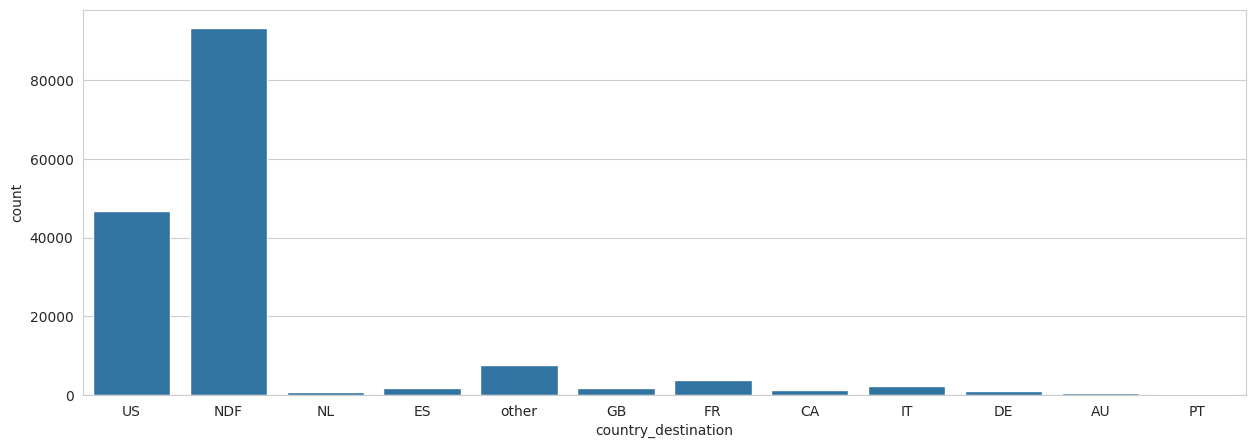

In [7]:
fig, (axis1) = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(
            x='country_destination', data=train_df, ax=axis1)

In [8]:
train_df["date_first_booking"].head(10)

def get_year_from_date(booking_date):
    if booking_date == booking_date:
        return int(str(booking_date)[:4])
    return booking_date 

def get_month_from_date(booking_date):
    if booking_date == booking_date:
        return int(str(booking_date)[5:7])
    return booking_date 

# Get dfb_year and dfb_month from DOB
train_df['dfb_year']  = train_df["date_first_booking"].apply(get_year_from_date)
train_df['dfb_year'].head(10)
train_df['dfb_month'] = train_df['date_first_booking'].apply(get_month_from_date)
train_df['dfb_month'].head(10)

test_df['dfb_year']  = test_df["date_first_booking"].apply(get_year_from_date)
test_df['dfb_month']  = test_df["date_first_booking"].apply(get_year_from_date)

<Axes: xlabel='dfb_year', ylabel='count'>

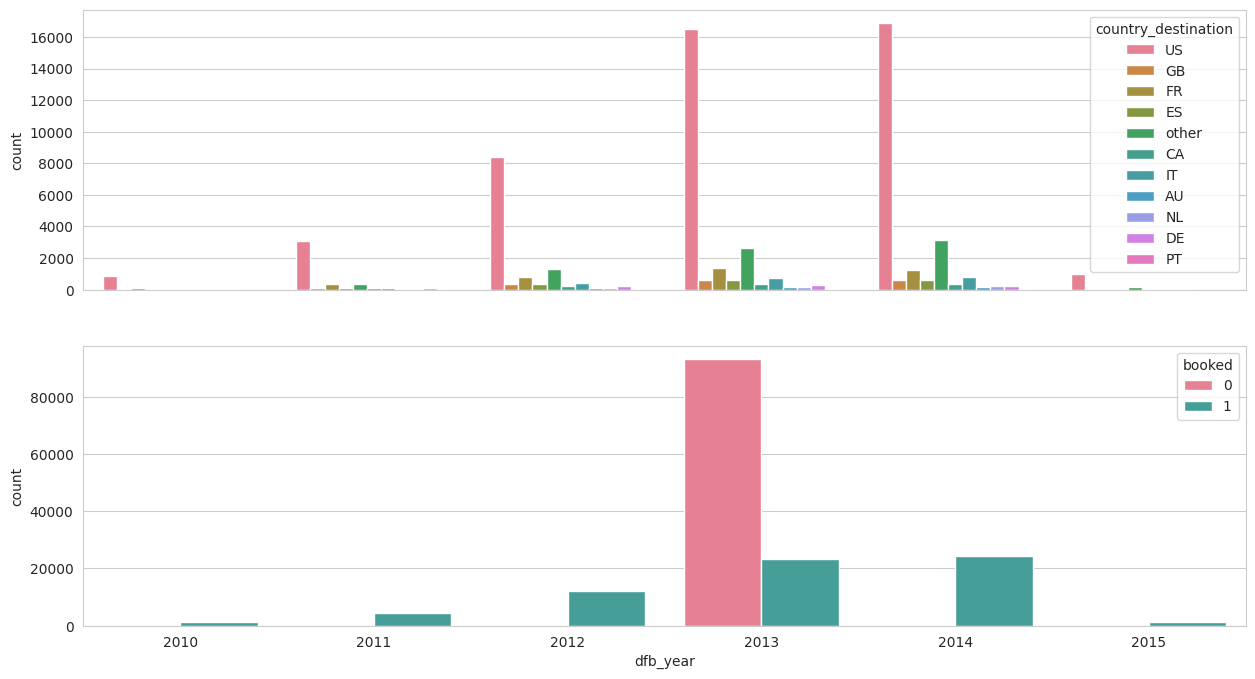

In [9]:
train_df['dfb_year'].fillna(train_df['dfb_year'].median(), inplace=True)
train_df['dfb_month'].fillna(train_df['dfb_month'].median(), inplace=True)

test_df['dfb_year'].fillna(test_df['dfb_year'].median(), inplace=True)
test_df['dfb_month'].fillna(test_df['dfb_month'].median(), inplace=True)


train_df[['dfb_year', 'dfb_month']] = train_df[['dfb_year', 'dfb_month']].astype(int)
test_df[['dfb_year', 'dfb_month']]   = test_df[['dfb_year', 'dfb_month']].astype(int)

fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
sns.countplot(x="dfb_year",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], ax=axis1)
sns.countplot(x="dfb_year",hue="booked", data=train_df, palette="husl", order=[2010,2011,2012,2013,2014,2015], ax=axis2)


# Analysis - Destination varies by Year significantly. Also, 2013 had the most non-bookings while other years had negligible non-bookings

<Axes: xlabel='dfb_month', ylabel='count'>

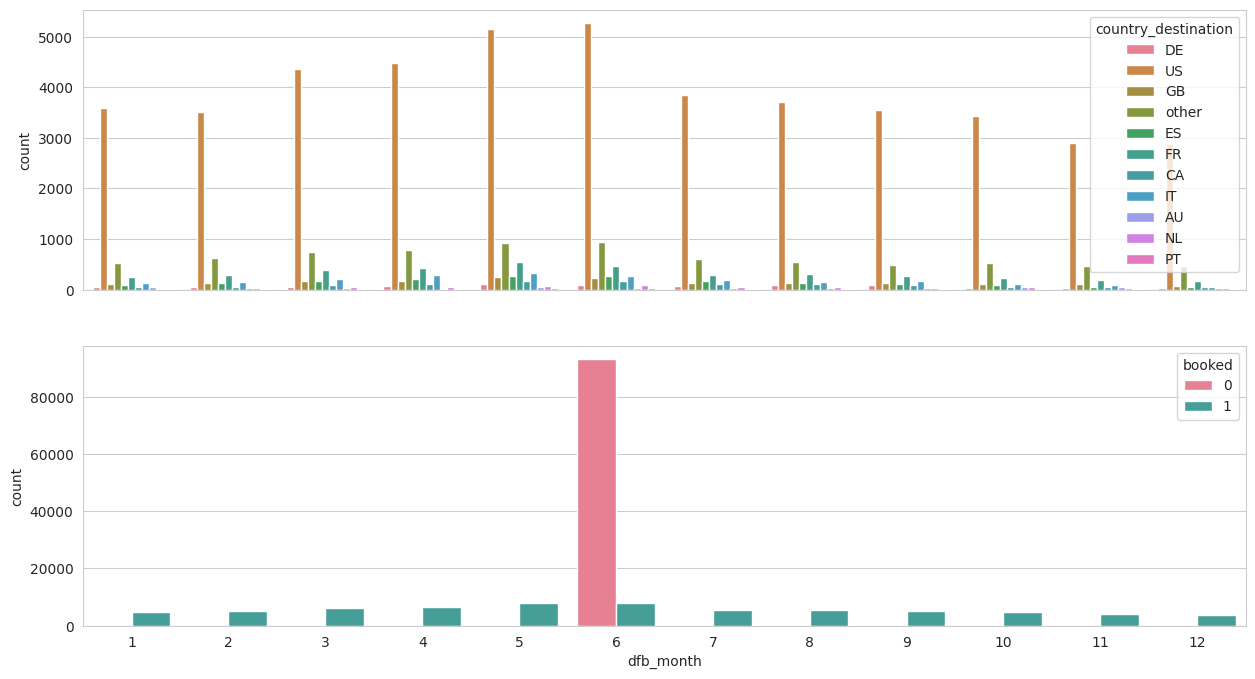

In [10]:
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
sns.countplot(x="dfb_month",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], ax=axis1)
sns.countplot(x="dfb_month",hue="booked", data=train_df, palette="husl", order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ax=axis2)

# Analysis - June month has a lot of non bookings i.e. NDF while other months have neglible NDFs. Rest of the months do not impact bookings significantly
# Would it make sense to classify months as June vs rest.

<Axes: xlabel='mid_year', ylabel='count'>

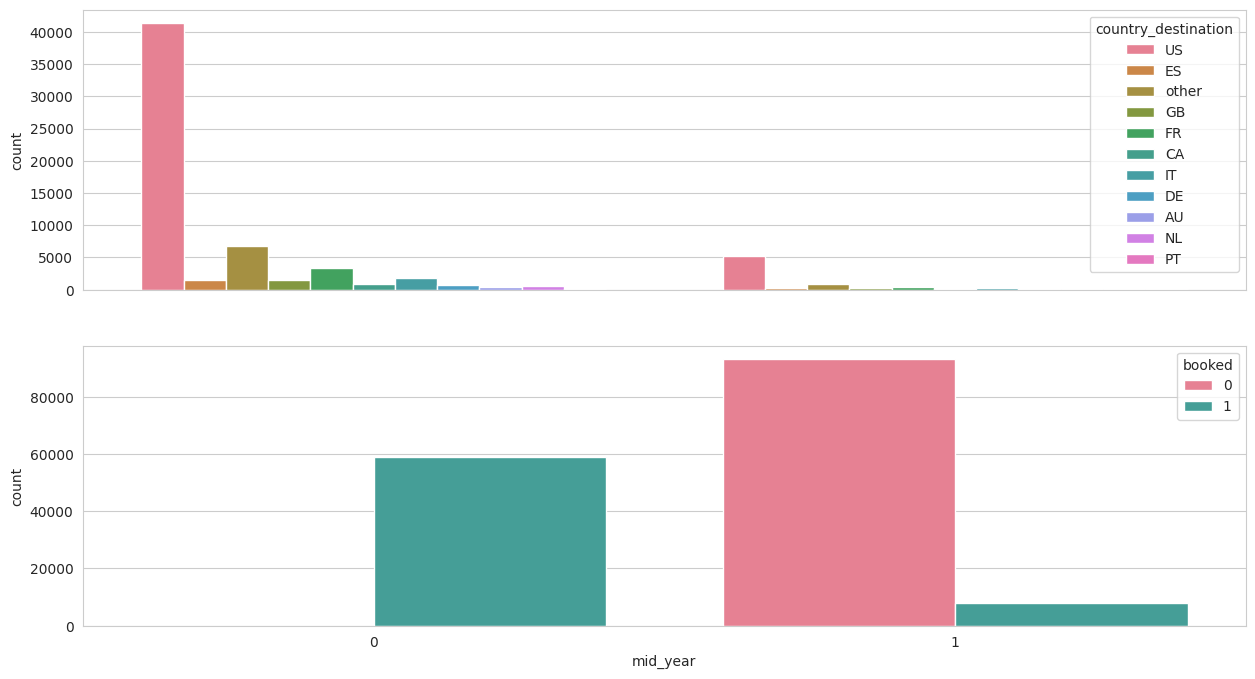

In [11]:
train_df["mid_year"] = train_df["dfb_month"].apply(lambda x: 1 if x == 6 else 0)
test_df["mid_year"] = test_df["dfb_month"].apply(lambda x: 1 if x == 6 else 0)
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
sns.countplot(x="mid_year",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], ax=axis1)
sns.countplot(x="mid_year",hue="booked", data=train_df, palette="husl", order=[0, 1], ax=axis2)

In [12]:
print(train_df['gender'].isnull().sum())
print(train_df['gender'].value_counts())

import random
print(random.randrange(1, 10000))

def assign_gender(gender):
    if gender not in ('MALE', 'FEMALE'):
        random_int = random.randrange(1, 10000)
        return 'MALE' if random_int % 2 == 0 else 'FEMALE'
    else:
        return gender

train_df['gender'] = train_df['gender'].apply(assign_gender)
test_df['gender']   = test_df['gender'].apply(assign_gender)

print(train_df['gender'].isnull().sum())
print(train_df['gender'].value_counts())

0
gender
-unknown-    71919
FEMALE       47068
MALE         40895
OTHER          206
Name: count, dtype: int64
4800
0
gender
FEMALE    83160
MALE      76928
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

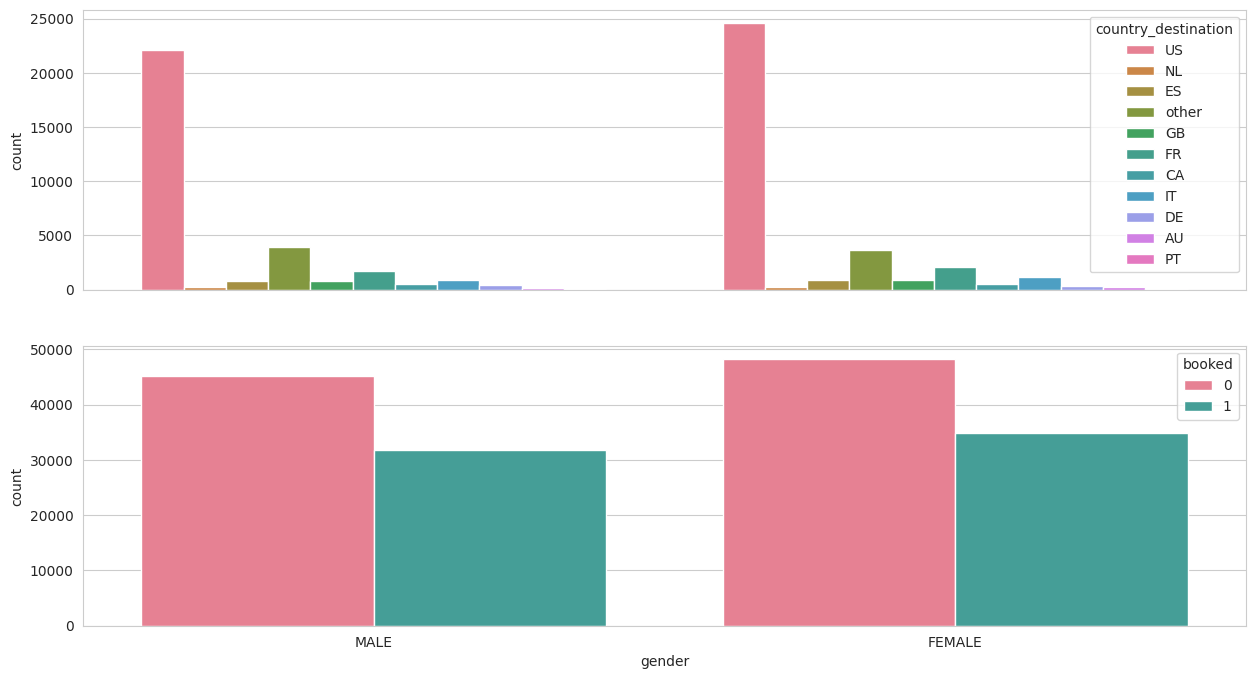

In [13]:
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True,figsize=(15,8))

sns.countplot(x="gender",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)
sns.countplot(x="gender",hue="booked", data=train_df, palette="husl", ax=axis2)

In [14]:
# Analysis on gender - does not seem to impact bookings as both genders have similar distributions

# drop columns
train_df.drop(['gender'], axis=1,inplace=True)
test_df.drop(['gender'], axis=1,inplace=True)

In [15]:
print(train_df['age'].isnull().sum())

train_df['age'].describe()

66092


count    93996.000000
mean        49.232372
std        152.804068
min          1.000000
25%         28.000000
50%         34.000000
75%         43.000000
max       2014.000000
Name: age, dtype: float64

In [16]:
# remove outlier values
train_df["age"][train_df["age"] > 100] = np.NaN
test_df["age"][test_df["age"] > 100]     = np.NaN

train_age_avg   = train_df["age"].mean()
train_age_std       = train_df["age"].std()
train_nan_age_size = train_df["age"].isnull().sum()

test_age_avg   = test_df["age"].mean()
test_age_std       = test_df["age"].std()
test_nan_age_size = test_df["age"].isnull().sum()

train_rand_age_list = np.random.randint(train_age_avg - train_age_std, train_age_avg + train_age_std, size = train_nan_age_size)
test_rand_age_list = np.random.randint(test_age_avg - test_age_std, test_age_avg + test_age_std, size = test_nan_age_size)

train_df["age"][np.isnan(train_df["age"])] = train_rand_age_list
test_df["age"][np.isnan(test_df["age"])]     = test_rand_age_list

train_df['age'] = train_df['age'].astype(int)
test_df['age']   = test_df['age'].astype(int)


/tmp/ipykernel_62877/2527300696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["age"][train_df["age"] > 100] = np.NaN
/tmp/ipykernel_62877/2527300696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["age"][test_df["age"] > 100]     = np.NaN
/tmp/ipykernel_62877/2527300696.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["age"][np.isnan(train_df["age"])] = train_rand_age_list
/tmp/ipykernel_62877/25

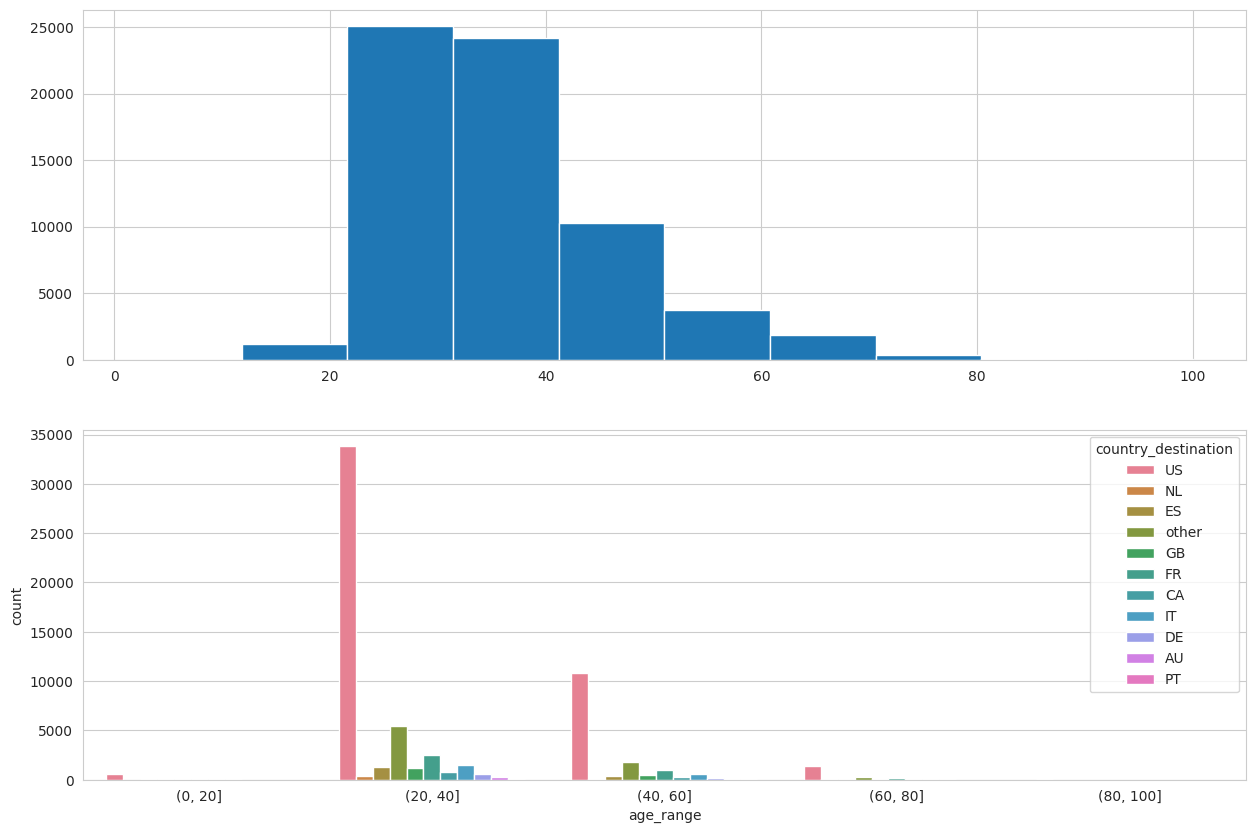

In [17]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))
train_df['age'][train_df['country_destination'] != 'NDF'].hist(ax=axis1)
train_df['age_range'] = pd.cut(train_df["age"], [0, 20, 40, 60, 80, 100])
sns.countplot(x="age_range",hue="country_destination", data=train_df[train_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)

train_df.drop(['age_range'], axis=1, inplace=True)
train_df.drop(['age'], axis=1, inplace=True)
test_df.drop(['age'], axis=1, inplace=True)

In [18]:
count_first_affiliate = len(np.unique(train_df["first_affiliate_tracked"].value_counts()))

count_nan_department_airbnb = train_df["first_affiliate_tracked"].isnull().sum()
count_nan_department_test   = test_df["first_affiliate_tracked"].isnull().sum()

rand_1 = np.random.randint(0, count_first_affiliate, size = count_nan_department_airbnb)
rand_2 = np.random.randint(0, count_first_affiliate, size = count_nan_department_test)

range_departments_airbnb = train_df['first_affiliate_tracked'].value_counts().index
range_departments_test   = test_df['first_affiliate_tracked'].value_counts().index

train_df["first_affiliate_tracked"][train_df["first_affiliate_tracked"] != train_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]
test_df["first_affiliate_tracked"][test_df["first_affiliate_tracked"] != test_df["first_affiliate_tracked"]]       = range_departments_test[rand_2]


/tmp/ipykernel_62877/2259303361.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["first_affiliate_tracked"][train_df["first_affiliate_tracked"] != train_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]
/tmp/ipykernel_62877/2259303361.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["first_affiliate_tracked"][test_df["first_affiliate_tracked"] != test_df["first_affiliate_tracked"]]       = range_departments_test[rand_2]


In [19]:
# signup_method
train_df["signup_method"] = (train_df["signup_method"] == "basic").astype(int)
test_df["signup_method"]   = (test_df["signup_method"] == "basic").astype(int)

# signup_flow
train_df["signup_flow"] = (train_df["signup_flow"] == 3).astype(int)
test_df["signup_flow"]   = (test_df["signup_flow"] == 3).astype(int)

# language
train_df["language"] = (train_df["language"] == 'en').astype(int)
test_df["language"]   = (test_df["language"] == 'en').astype(int)

# affiliate_channel
train_df["affiliate_channel"] = (train_df["affiliate_channel"] == 'direct').astype(int)
test_df["affiliate_channel"]   = (test_df["affiliate_channel"] == 'direct').astype(int)

# affiliate_provider
train_df["affiliate_provider"] = (train_df["affiliate_provider"] == 'direct').astype(int)
test_df["affiliate_provider"]   = (test_df["affiliate_provider"] == 'direct').astype(int)

In [20]:
from sklearn import preprocessing

for f in train_df.columns:
    if f == "country_destination" or f == "id": continue
    if train_df[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(train_df[f].values) + list(test_df[f].values)))
        train_df[f] = lbl.transform(list(train_df[f].values))
        test_df[f]   = lbl.transform(list(test_df[f].values))

In [21]:
X_train = train_df.drop(["country_destination", "id", 'booked'],axis=1)
Y_train = train_df["country_destination"]
X_test  = test_df.drop(["country_destination", "id", 'booked'],axis=1).copy()
Y_test = test_df["country_destination"]

In [22]:
country_num_dic = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_country_dic = {y:x for x,y in country_num_dic.items()}

Y_train    = Y_train.map(country_num_dic)

In [23]:
print(X_train.columns)
print(X_test.columns)

Index(['date_first_booking', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'dfb_year',
       'dfb_month', 'mid_year'],
      dtype='object')
Index(['date_first_booking', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'dfb_year',
       'dfb_month', 'mid_year'],
      dtype='object')


In [32]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

print(random_forest.score(X_train, Y_train))
print(random_forest.score(X_test, Y_test))
# rf_accuracy = accuracy_score(Y_test, Y_pred)
# print(rf_accuracy)


0.9413572535105692
0.0


In [25]:
import xgboost as xgb

params = {"objective": "multi:softmax", "num_class": 12}

T_train_xgb = xgb.DMatrix(X_train, Y_train)
X_test_xgb  = xgb.DMatrix(X_test)

gbm = xgb.train(params, T_train_xgb, 20)
Y_pred = gbm.predict(X_test_xgb)

In [26]:
# convert type to integer
Y_pred = Y_pred.astype(int)

# change values back to original country symbols
Y_pred = pd.Series(Y_pred).map(num_country_dic)

In [27]:
country_df = pd.DataFrame({
        "id": test_df["id"],
        "country_destination": Y_pred
    })

In [28]:
country_df["country_destination"].head(10)

0    NDF
1     US
2    NDF
3    NDF
4    NDF
5     US
6     US
7    NDF
8     US
9     US
Name: country_destination, dtype: object

In [29]:
xgb_accuracy = accuracy_score(Y_test, Y_pred)
print(xgb_accuracy)

0.8781740157037647
